In [2]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import pickle
import os

# Main code

In [ ]:
# data_dir='C:\\Users\\dell\\Downloads\\AReM'
# col_names = ['# Columns: time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
# com_list=[]
# for folder in os.listdir(data_dir):
#     folder_path=os.path.join(data_dir,folder)
#     for file in os.listdir(folder_path):
#         file_path=os.path.join(folder_path,file)
#         l=file_path.split('\\')[-1:-3:-1]
#         l[0]=l[0][:-4]
#         l[0],l[1]=l[1],l[0]
#         S='-'.join(l)
#         df = pd.read_csv(file_path,names=col_names)
#         df.drop(index=[0,1,2,3,4],inplace=True)
#         df.reset_index(inplace=True)
#         df.drop(columns='index',inplace=True)
#         df['Category']=S        
#         com_list.append(df)
# result=pd.concat(com_list)
# result.to_csv('C:\\Users\\dell\\inuron\\Combined.csv',index=False)

### step 1: going into folder and open files one by one
### step2 : make a new column named category for 'cycling','lying' etc
### step3: combine all the data from all files into one file named 'Combinednew.csv'


In [3]:
data_dir='C:\\Users\\dell\\Downloads\\AReM'
col_names = ['# Columns: time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
com_list=[]
for folder in os.listdir(data_dir):
    folder_path=os.path.join(data_dir,folder)
    for file in os.listdir(folder_path):
        file_path=os.path.join(folder_path,file)
        l=file_path.split('\\')[-2]
        #l[0]=l[0][:-4]
        #l[0],l[1]=l[1],l[0]
        #S='-'.join(l)
        df = pd.read_csv(file_path,names=col_names)
        df.drop(index=[0,1,2,3,4],inplace=True)
        df.reset_index(inplace=True)
        df.drop(columns='index',inplace=True)
        df['Category']=l       
        com_list.append(df)
result=pd.concat(com_list)
result.to_csv('C:\\Users\\dell\\inuron\\Combinednew.csv',index=False)

In [3]:
dfc1=pd.read_csv('C:\\Users\\dell\\inuron\\Combinednew.csv')

In [4]:
dfc1

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0                 1000      39.50       0.50      24.00       0.00      33.00   
1                 1250      39.25       0.43      24.00       0.00      33.00   
2                 1500      39.25       0.43      24.00       0.00      33.00   
3                 1750      39.00       0.00      23.75       0.43      33.00   
4                 2000      39.50       0.50      24.00       0.00      33.00   
...                ...        ...        ...        ...        ...        ...   
42226           118750      31.50       1.66      12.50       3.20      14.25   
42227           119000      27.33       1.25      11.33       0.94      20.00   
42228           119250      37.80       7.68      14.20       2.48      17.25   
42229           119500      33.75       1.30      15.75       5.21      16.50   
42230           119750      32.67       3.09      18.67       0.47      14.00   

       var_rss23  Category  
0           0.00  bending1  
1           0.00  bending1  
2           0.00  bending1  
3           0.00  bending1  
4           0.00  bending1  
...          ...       ...  
42226       4.44   walking  
42227       4.00   walking  
42228       0.83   walking  
42229       2.69   walking  
42230       3.16   walking  

[42231 rows x 8 columns]

In [67]:
nan=dfc1.isnull()

In [68]:
is_NaN = dfc1. isnull()
row_has_NaN = is_NaN. any(axis=1)
rows_with_NaN = dfc1[row_has_NaN]
rows_with_NaN

Empty DataFrame
Columns: [# Columns: time, avg_rss12, var_rss12, avg_rss13, var_rss13, avg_rss23, var_rss23, Category]
Index: []

In [66]:
dfc1.drop(columns='# Columns: time',inplace=True)


### checking for out liers in combined data set
### THESE ARE NOT OUTLIERS,as these are data set of 6 different positions of human being.If we check for individual data set of say bending1,bending2 or any other folder we will see zero to no outliers

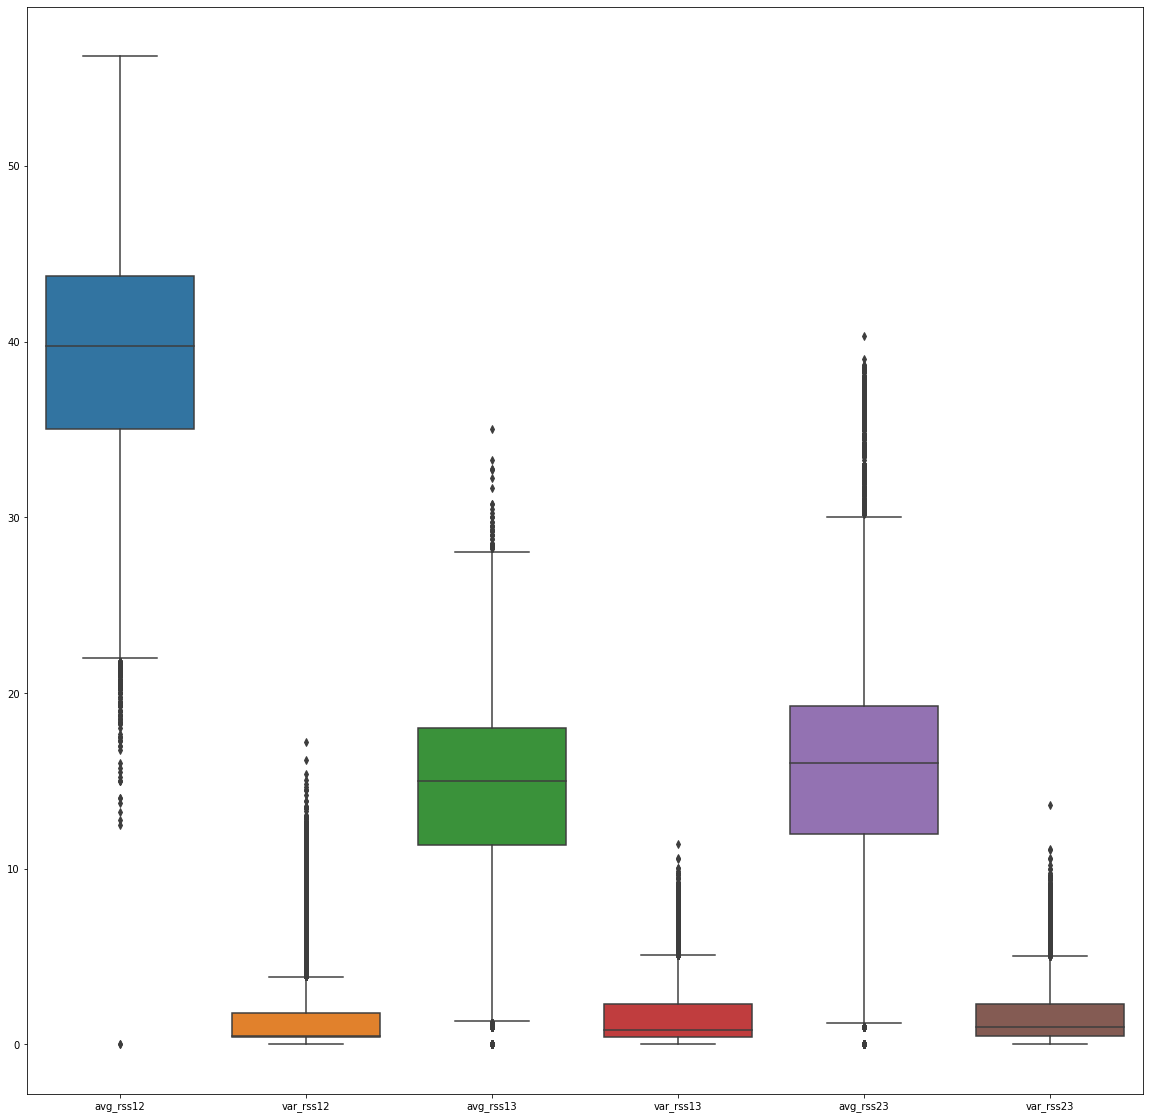

In [67]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data=dfc1,ax=ax)

### dividing data into train test without considering time column because time is a fixed interval and independent of any of the other factors.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(dfc1[['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']],dfc1['Category'],test_size=0.1, random_state=42)

In [58]:
from sklearn import linear_model


In [59]:
my_model=linear_model.LogisticRegression(max_iter=10000)
my_model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [70]:
X_test

avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
18819      39.33       0.47       8.00       1.41      12.00       0.00
38941      32.50       5.68      16.50       4.72      12.25       6.42
18633      39.50       0.50      12.00       0.00       5.67       0.94
34385      47.50       0.50      17.75       0.43      12.00       0.00
1278       43.00       1.22      24.00       0.00      30.00       0.00
...          ...        ...        ...        ...        ...        ...
12604      34.50       1.50      18.00       0.71      15.75       2.49
29817      44.50       0.50      12.50       0.87      14.25       0.83
38365      27.25       6.38      16.25       3.63      15.50       3.57
27156      42.00       0.00      18.00       0.00      17.00       0.82
22691      41.50       0.50       2.00       0.00       7.00       0.71

[4224 rows x 6 columns]

In [73]:
my_model.predict(X_test)

array(['lying', 'walking', 'lying', ..., 'walking', 'sitting', 'lying'],
      dtype=object)

In [61]:
my_model.score(X_test,y_test)

0.6796875

In [13]:
X_test

avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
18819      39.33       0.47       8.00       1.41      12.00       0.00
38941      32.50       5.68      16.50       4.72      12.25       6.42
18633      39.50       0.50      12.00       0.00       5.67       0.94
34385      47.50       0.50      17.75       0.43      12.00       0.00
1278       43.00       1.22      24.00       0.00      30.00       0.00
...          ...        ...        ...        ...        ...        ...
12604      34.50       1.50      18.00       0.71      15.75       2.49
29817      44.50       0.50      12.50       0.87      14.25       0.83
38365      27.25       6.38      16.25       3.63      15.50       3.57
27156      42.00       0.00      18.00       0.00      17.00       0.82
22691      41.50       0.50       2.00       0.00       7.00       0.71

[4224 rows x 6 columns]

In [15]:
PREDICTED_OUTPUT=my_model.predict(X_test)
PREDICTED_OUTPUT

array(['lying', 'walking', 'lying', ..., 'walking', 'sitting', 'lying'],
      dtype=object)

### making confusion matrix and plotting heat map to compare predicted and actual values.

In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,PREDICTED_OUTPUT)
cm

array([[295,   2,   3,   0,  53,   2,   0],
       [ 18, 205,  13,  24,  16,   1,   6],
       [  1,  11, 478,   1,  40,   8, 196],
       [  0,  16,   2, 625,  10,  60,   2],
       [ 20,  43,  11,  89, 354, 161,   4],
       [  4,   0,   9,  70, 203, 415,   2],
       [  0,  10, 233,   0,   3,   6, 499]], dtype=int64)

Text(69.0, 0.5, 'actual value')

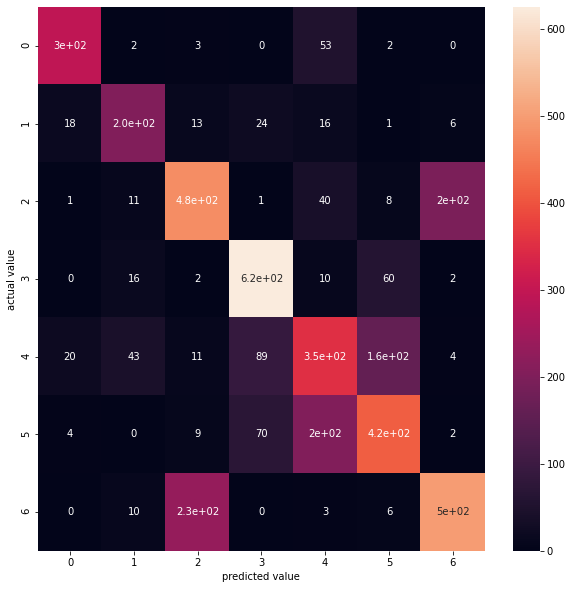

In [20]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted value')
plt.ylabel('actual value')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaling=StandardScaler()
scaling.fit_transform(dfc1[['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']])

array([[ 0.09186133, -0.46840235,  1.78913054, -0.91640162,  2.51937502,
        -0.99012005],
       [ 0.05241361, -0.50258042,  1.78913054, -0.91640162,  2.51937502,
        -0.99012005],
       [ 0.05241361, -0.50258042,  1.78913054, -0.91640162,  2.51937502,
        -0.99012005],
       ...,
       [-0.17638315,  3.03729103, -0.01447723,  0.59620659,  0.18066213,
        -0.48312845],
       [-0.81543616, -0.07779584,  0.27078726,  2.26129548,  0.06929485,
         0.65302141],
       [-0.9858503 ,  0.79618621,  0.80818876, -0.62973797, -0.30192942,
         0.94011304]])

In [44]:
df_new_scaled=pd.DataFrame(scaling.fit_transform(dfc1[['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']]))

In [45]:
df_new_scaled

0         1         2         3         4         5
0      0.091861 -0.468402  1.789131 -0.916402  2.519375 -0.990120
1      0.052414 -0.502580  1.789131 -0.916402  2.519375 -0.990120
2      0.052414 -0.502580  1.789131 -0.916402  2.519375 -0.990120
3      0.012966 -0.712531  1.743120 -0.654135  2.519375 -0.990120
4      0.091861 -0.468402  1.789131 -0.916402  2.519375 -0.990120
...         ...       ...       ...       ...       ...       ...
42226 -1.170466  0.097977 -0.327348  1.035351 -0.264807  1.721980
42227 -1.828454 -0.102209 -0.542677 -0.343074  0.589009  1.453213
42228 -0.176383  3.037291 -0.014477  0.596207  0.180662 -0.483128
42229 -0.815436 -0.077796  0.270787  2.261295  0.069295  0.653021
42230 -0.985850  0.796186  0.808189 -0.629738 -0.301929  0.940113

[42231 rows x 6 columns]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df_new_scaled[[0,1,2,3,4,5]],dfc1['Category'],test_size=0.1, random_state=42)

In [47]:
X_train

0         1         2         3         4         5
37703  0.486338  0.625296  0.427223  1.419602 -0.242534  1.282180
36209 -0.775988  0.752243  0.132756  1.059748  0.069295  1.056171
25786 -2.077763 -0.077796  1.237006 -0.916402  0.292029 -0.990120
17965  0.276477 -0.483050 -0.419369 -0.916402 -2.232296 -0.990120
7161  -1.170466  0.556940  1.835141  0.175360  0.217785 -0.073870
...         ...       ...       ...       ...       ...       ...
6265   0.604682  0.400697  0.362808  0.931664  0.329152  1.392130
11284  0.423222  0.293280  0.464031  1.565984 -0.227685  1.147796
38158 -0.065930  2.422086  1.052964 -0.172296  0.217785  2.076263
860    0.880816 -0.468402  1.789131 -0.916402  2.073906 -0.990120
15795  0.052414 -0.502580 -1.293566 -0.251586  0.106417 -0.727462

[38007 rows x 6 columns]

In [5]:
my_model2=linear_model.LogisticRegression(max_iter=10000)
my_model2.fit(X_train,y_train)

NameError: name 'linear_model' is not defined

In [49]:
my_model2.predict(X_test)

array(['lying', 'walking', 'lying', ..., 'walking', 'sitting', 'lying'],
      dtype=object)

In [51]:
my_model2.score(X_test,y_test)

0.6794507575757576

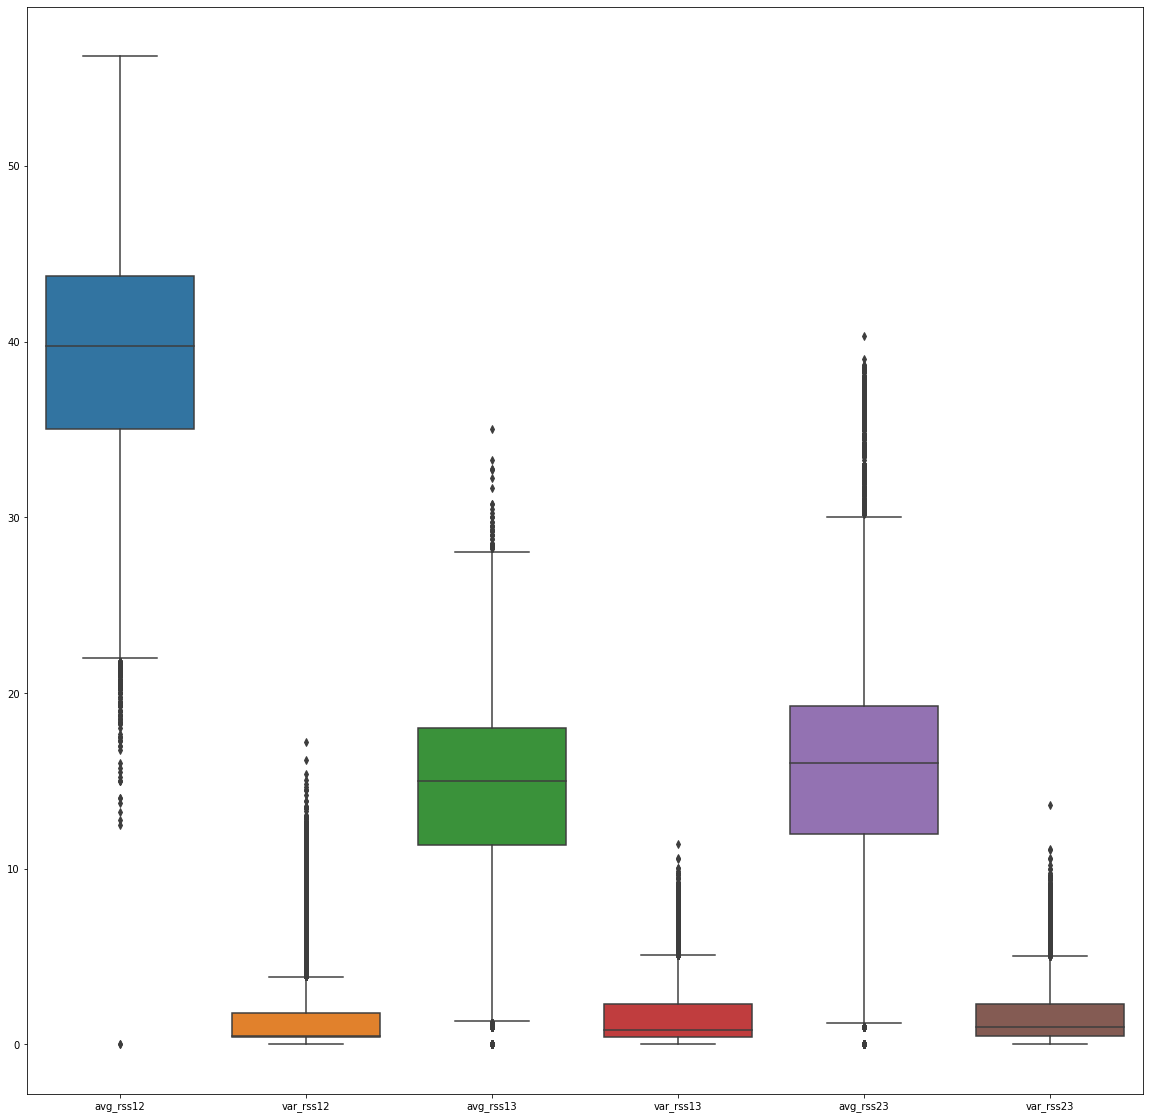

In [64]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data=dfc1,ax=ax)

In [6]:
df1=pd.read_csv('C:\\Users\\dell\\Downloads\\AReM\\bending1\\dataset1.csv')

In [7]:
q=df1['avg_rss13'].quantile(.995)
df_new=df1[df1['avg_rss13']>q]
df_new

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
307            76750       38.5        0.5      27.25       0.43      36.75   
403           100750       45.0        0.0      29.50       0.50      30.00   
404           101000       45.0        0.0      27.50       0.50      30.00   

     var_rss23  
307       0.83  
403       0.00  
404       0.00

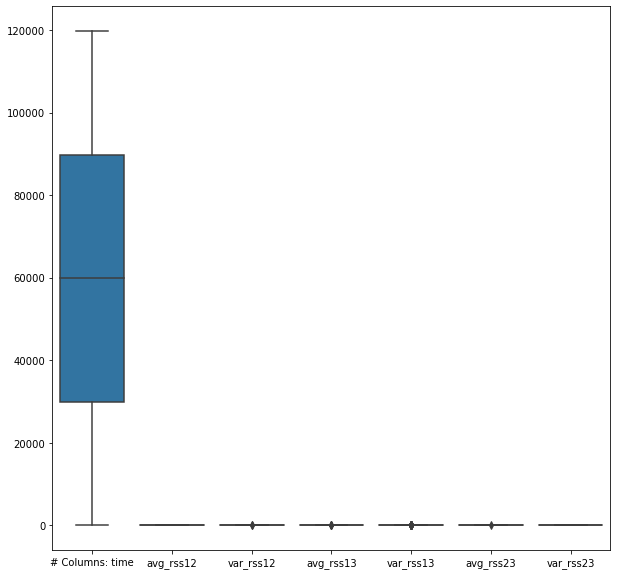

In [8]:
fig ,ax  = plt.subplots(figsize = (10,10))
sns.boxplot(data=df1,ax=ax)

In [9]:
df2=pd.read_csv('C:\\Users\\dell\\Downloads\\dataset1.csv')

In [10]:
df2.drop(columns='# Columns: time',inplace=True)

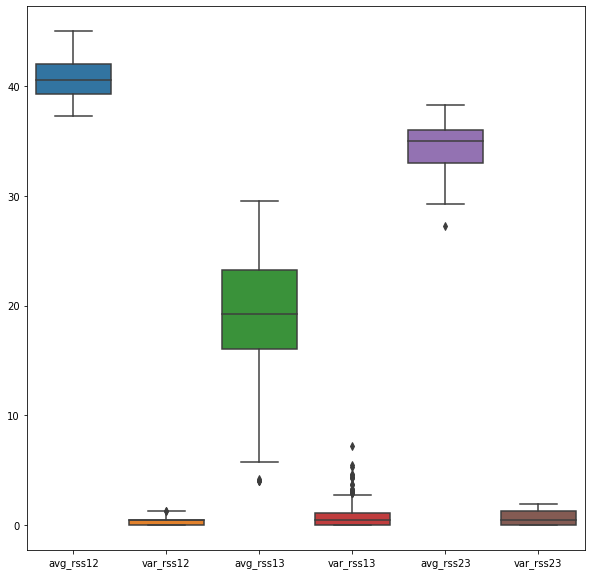

In [11]:
fig ,ax  = plt.subplots(figsize = (10,10))
sns.boxplot(data=df2,ax=ax)

In [31]:
col_names = ['# Columns: time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']

In [91]:
s='C:\\Users\\dell\\Downloads\\AReM\\bending1\\dataset2.csv'
l=s.split('\\')[-1:-3:-1]
l[0]=l[0][:-4]
l[0],l[1]=l[1],l[0]
S='-'.join(l)
# print(S)
df1 = pd.read_csv('C:\\Users\\dell\\Downloads\\AReM\\bending1\\dataset2.csv',names=col_names)
df1.drop(index=[0,1,2,3,4],inplace=True)
df1.reset_index(inplace=True)
df1.drop(columns='index',inplace=True)
df1['Category']=S
df1.to_csv('C:\\Users\\dell\\inuron\\Combined.csv',index=False)

TypeError: to_csv() got an unexpected keyword argument 'inplace'

In [12]:
dfbend=pd.read_excel('C://Users//dell//Downloads//AReM//bend/bend1.xlsx')
dfbend.drop(columns='# Columns: time',inplace=True)
dfbend[70:100]

avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
70      42.00       0.00       4.00       0.00      33.00       0.00
71      41.75       0.43       9.50       1.80      33.00       0.00
72      42.00       0.00      10.67       0.47      33.00       0.00
73      41.50       0.50      13.00       1.00      33.75       1.30
74      41.50       0.50       9.00       2.16      33.00       0.00
75      41.75       0.43      13.50       0.87      33.00       0.00
76      42.00       0.00      13.50       7.23      33.00       0.00
77      41.75       0.43      10.00       3.08      33.00       0.00
78      41.67       0.47      16.33       2.62      33.75       1.30
79      42.00       0.00      13.50       0.87      33.00       0.00
80      41.75       0.43      13.00       0.71      33.00       0.00
81      42.00       0.00       9.25       2.68      33.00       0.00
82      42.00       0.00      13.75       2.17      33.00       0.00
83      42.00       0.00      18.00       1.22      33.75       1.30
84      42.00       0.00      18.25       0.43      35.25       1.30
85      42.00       0.00      18.00       0.00      36.00       0.00
86      42.00       0.00      17.00       0.82      36.00       0.00
87      42.00       0.00      16.00       0.71      33.75       1.30
88      42.00       0.00      16.50       1.12      35.00       1.41
89      42.00       0.00      15.75       0.83      33.75       1.30
90      42.00       0.00      18.00       0.00      33.75       1.30
91      42.00       0.00      18.00       0.00      34.75       1.09
92      42.00       0.00      18.00       0.00      35.00       1.22
93      42.00       0.00      18.00       0.00      34.50       1.50
94      42.00       0.00      18.00       0.00      33.67       0.94
95      42.00       0.00      19.50       0.50      35.25       1.30
96      42.00       0.00      18.00       0.00      35.75       0.43
97      42.00       0.00      18.00       0.00      35.00       1.41
98      42.00       0.00      18.00       0.00      35.00       1.41
99      42.00       0.00      18.00       0.00      35.25       1.30

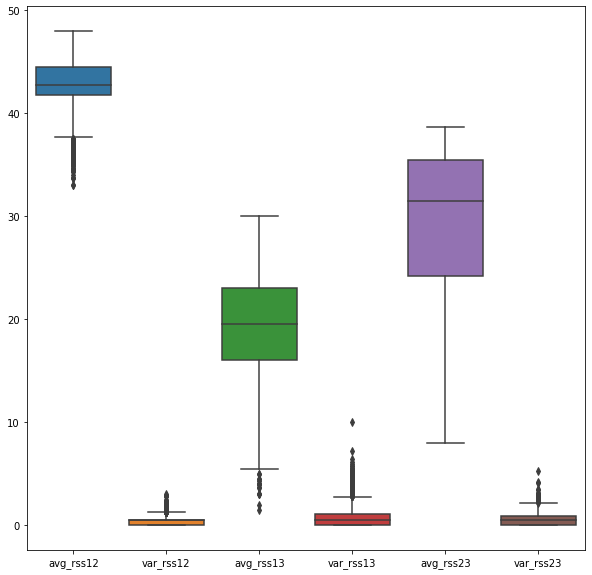

In [102]:
fig ,ax  = plt.subplots(figsize = (10,10))
sns.boxplot(data=dfbend,ax=ax)

In [103]:
dfbend.describe()

avg_rss12    var_rss12    avg_rss13    var_rss13    avg_rss23  \
count  3360.000000  3360.000000  3360.000000  3360.000000  3360.000000   
mean     42.667723     0.454360    19.158830     0.793399    30.201982   
std       2.361918     0.400185     4.553348     0.915341     5.761234   
min      33.000000     0.000000     1.500000     0.000000     8.000000   
25%      41.750000     0.000000    16.000000     0.000000    24.250000   
50%      42.750000     0.470000    19.500000     0.500000    31.500000   
75%      44.500000     0.500000    23.000000     1.120000    35.500000   
max      48.000000     3.000000    30.000000    10.030000    38.670000   

        var_rss23  
count  3360.00000  
mean      0.55239  
std       0.54323  
min       0.00000  
25%       0.00000  
50%       0.47000  
75%       0.87000  
max       5.26000

In [16]:
Q1=dfbend.quantile(.25)
Q2=dfbend.quantile(0.50)
Q3=dfbend.quantile(0.75)

In [17]:
IQR=Q3-Q1

In [18]:
LOWER_FENCE=Q1-1.5*IQR
UPPER_FENCE=Q3+1.5*IQR

In [19]:
LOWER_FENCE

avg_rss12    37.625
var_rss12    -0.750
avg_rss13     5.500
var_rss13    -1.680
avg_rss23     7.375
var_rss23    -1.305
dtype: float64

In [20]:
dfbend_processed=dfbend[(dfbend>LOWER_FENCE)&(dfbend<UPPER_FENCE)]

In [23]:
dfbend_processed.info()
dfbend_processed.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   avg_rss12  3225 non-null   float64
 1   var_rss12  3207 non-null   float64
 2   avg_rss13  3343 non-null   float64
 3   var_rss13  3218 non-null   float64
 4   avg_rss23  3360 non-null   float64
 5   var_rss23  3341 non-null   float64
dtypes: float64(6)
memory usage: 157.6 KB


In [24]:
dfbend_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2992 entries, 0 to 3357
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   avg_rss12  2992 non-null   float64
 1   var_rss12  2992 non-null   float64
 2   avg_rss13  2992 non-null   float64
 3   var_rss13  2992 non-null   float64
 4   avg_rss23  2992 non-null   float64
 5   var_rss23  2992 non-null   float64
dtypes: float64(6)
memory usage: 163.6 KB


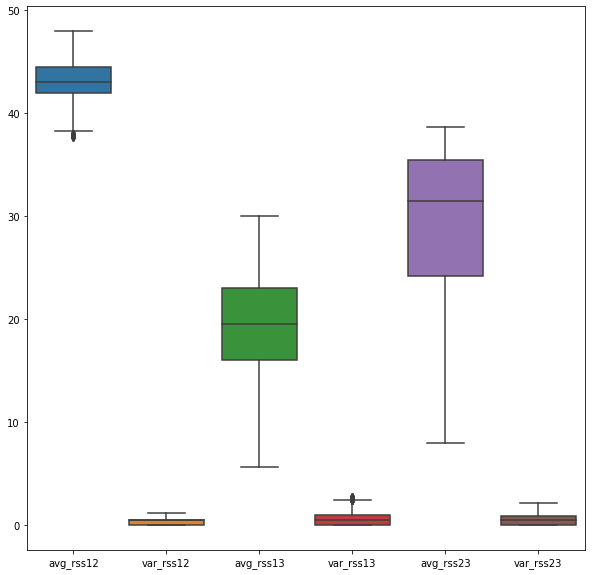

In [22]:
fig ,ax  = plt.subplots(figsize = (10,10))
sns.boxplot(data=dfbend_processed,ax=ax)

In [148]:
dfbend_processed.dropna(inplace=True)

In [150]:
dfbend_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2992 entries, 0 to 3357
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   avg_rss12  2992 non-null   float64
 1   var_rss12  2992 non-null   float64
 2   avg_rss13  2992 non-null   float64
 3   var_rss13  2992 non-null   float64
 4   avg_rss23  2992 non-null   float64
 5   var_rss23  2992 non-null   float64
dtypes: float64(6)
memory usage: 163.6 KB


In [151]:
ProfileReport(dfbend_processed)



Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
'''
Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)2)
DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
Age: Age (years)
Outcome: Class variable (0 if non-diabetic, 1 if diabetic)'''

'\nPregnancies: Number of times pregnant\nGlucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test\nBloodPressure: Diastolic blood pressure (mm Hg)\nSkinThickness: Triceps skin fold thickness (mm)\nInsulin: 2-Hour serum insulin (mu U/ml)\nBMI: Body mass index (weight in kg/(height in m)2)\nDiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)\nAge: Age (years)\nOutcome: Class variable (0 if non-diabetic, 1 if diabetic)'

In [ ]:
[[],[]]